# Part I - Ford GoBike System Dataset
## by Nwangene Sobe-Olisa Andrew

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [61]:
# loading the dataset into pandas dataframe  
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [62]:
# high-level overview of data shape and composition
print(df.info())
print(df.shape)
print(df['bike_share_for_all_trip'].unique())
print(df.member_gender.unique())
print(df.user_type.unique())
print(df.start_station_name.nunique())
print(df.end_station_name.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [63]:
# to convert 'member_gender' column to a categorical i need to drop the 'nan' values.
df.dropna(subset=['member_gender'], how='all', inplace=True)

In [64]:
print(df.member_gender.unique())

['Male' 'Other' 'Female']


In [65]:
# convert 'bike_share_for_all_trip', 'member_gender', 'user_type' to categorical type
category_var_dict = {'bike_share_for_all_trip': ['No','Yes'],
                    'member_gender': ['Male','Other','Female'],
                    'user_type': ['Customer', 'Subscriber']}

for var in category_var_dict:
    category_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_var_dict[var])
    df[var] = df[var].astype(category_var)

In [66]:
# now that we've adjsuted th data type, let's describe the dataset using pandas
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,175147.000000,174952.000000,175147.000000,175147.000000,174952.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,139.002126,37.770814,-122.351305,136.604486,37.771007,-122.350881,4482.252639,1984.806437
std,1641.608363,111.648819,0.101070,0.118453,111.335635,0.100978,0.118018,1658.303747,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183412 rides with 16 variables. The variables shows the duration of rides, type of rider(customer or subscriber), the date of birth of riders and gender of riders almost others.

### What is/are the main feature(s) of interest in your dataset?

> I'm intrested in finding out which of the variables influence the duration of rides and to what degree.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i'll be focusing on riders age (can be determined from the year of birth of the riders), to know if younger riders ride longer.
Will also look at the gender variable, membership status of the rider and bike share data.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


first, lets visualize the 'duration_sec' column which is our main interest

<AxesSubplot:xlabel='duration_sec', ylabel='Count'>

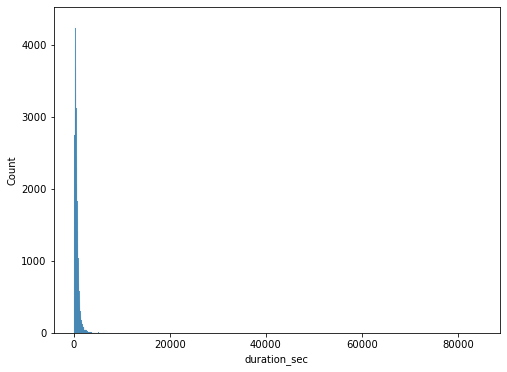

In [67]:
# using a standard-scaled histplot
plt.figure(figsize=[8,6])
sb.histplot(data=df, x='duration_sec')

C:\ProgramData\Anaconda3\envs\udacity\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


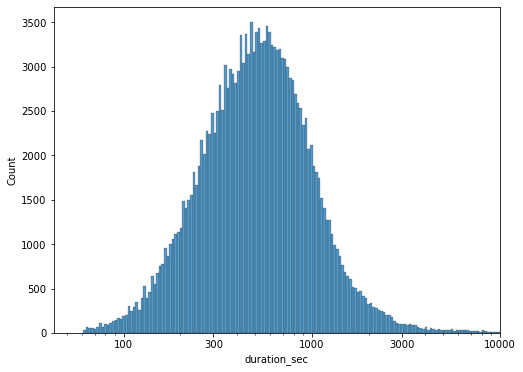

In [68]:
# the data is highly skewed, so for more even distributuion we'll change the scaling to log
plt.figure(figsize = [8,6])
g=sb.histplot(data=df, x='duration_sec', log_scale=True)
x_ticks=[100, 300, 1000, 3000, 10000, 30000]
g.set(xticks=x_ticks, xticklabels=x_ticks)
plt.xlim(0,10000);

Duration_sec has a long-tailed distribution, with a lot of ride on the low duration side and very few on the high end. changing the scale to a log scale shows a single duration peak between 300 and 1000 duration sec.

Next up, let's visualize the next interesting variable; 'member_gender'.

<AxesSubplot:xlabel='user_type', ylabel='count'>

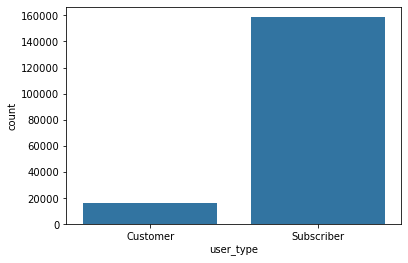

In [69]:
# since it's a quantitative variabe ()using a bar plot, 
# i'll place the categorical variable(user_type) on the x-axis
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='user_type', color=base_color)

The above visualization shows that a large majority of the riders in the dataset are Subscribers (ie with memberships).

Next, we visualize the third variable of interest; `member_gender`. Since it's also a categorical variable with 3 categories a pie chart will best describe the relationship.

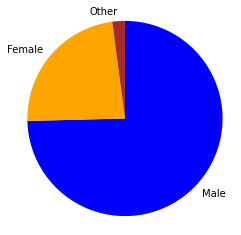

In [70]:
# first we create a value count variable for the 'member_gender'
sorted_counts = df['member_gender'].value_counts()

# plotting the pie chart 
plt.pie(sorted_counts, labels=sorted_counts.index, 
        colors=['blue', 'orange', 'brown'], startangle=90, counterclock=False)
plt.axis('square');

The above visualization hows that most of the riders in the dataset are male, followed by females then others.

Also we'll look at the age distribution of the riders. Note that age column doesn't exist in the original dataset. so, some wrangling will be done to extract the ages (at the time of ride) from the avaliable dataset.

In [88]:
# first, we create a new column (ride_year) with the first 4 letters in start_time
# the first four strings in the 'start_time' column contains the year in which the ride was made
df['ride_year']=df.start_time.str[:4]

# to subtract between columns, the columns needs to be of int or float dtype
# so, coverting 'ride_year' and 'member_birth_year' to int
convert= {'ride_year': int,
          'member_birth_year': int
         }
df=df.astype(convert)

# creating a new column for the age of riders
df['age'] = df['ride_year'] - df['member_birth_year']


In [91]:
# checking the info of the new dataframe
df.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_year,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,45


In [101]:
# checking for any null value in the new column
df.age.isnull().sum()

0

In [103]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,ride_year,age
count,175147.000000,174952.000000,175147.000000,175147.000000,174952.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.0,175147.000000
mean,704.211845,139.002126,37.770814,-122.351305,136.604486,37.771007,-122.350881,4482.252639,1984.806437,2019.0,34.193563
std,1641.608363,111.648819,0.101070,0.118453,111.335635,0.100978,0.118018,1658.303747,10.116689,0.0,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000,2019.0,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000,2019.0,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000,2019.0,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,141.000000


With the above wrangling, we now have a clean `age` column with the ages of the riders, now lets go ahead to create an age distribution.

<AxesSubplot:xlabel='age', ylabel='Count'>

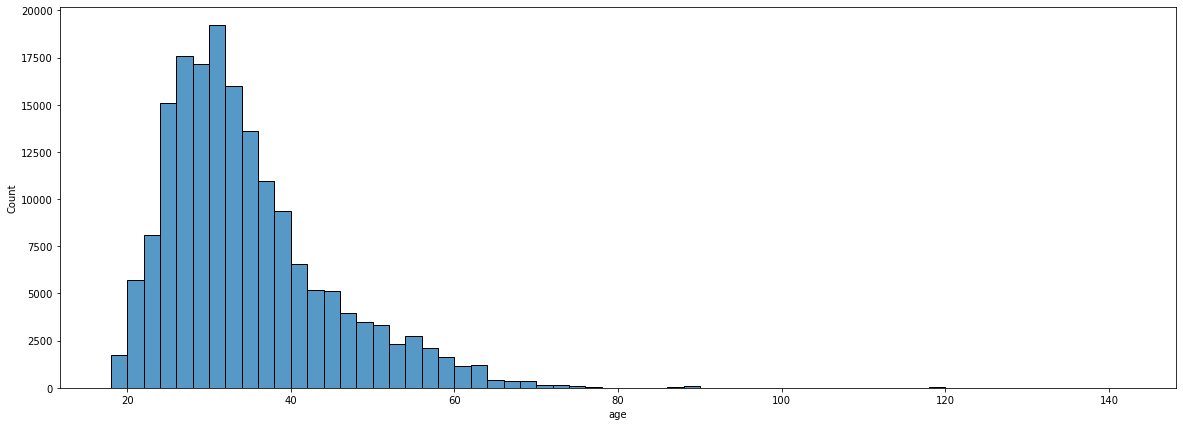

In [109]:
# plotting a standard-scaled histogram
plt.figure(figsize=[20,7])
bins=np.arange(18, 141+2, 2)
sb.histplot(data=df, x='age', bins=bins);

The plot above indicates a right-skewness in the age distribution. With peak at 35years. This indicates that majority of the riders are btween 20-40 years. 
Also, that most of the data is set to the far left of its axis, suggests some strong outliers on the right. let's identify these outliers and filter them, if need be.

In [122]:
#using criteria eyeballed from the plot to select the outliers
outliers=df['age'] >110
print(outliers.sum())

71


In [123]:
df.loc[outliers,:]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_year,age
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,2019,119
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No,2019,119
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No,2019,119
19375,641,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No,2019,119
21424,1424,2019-02-26 08:58:02.9040,2019-02-26 09:21:47.7490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No,2019,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.6070,2019-02-03 17:56:42.9490,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900,Male,No,2019,119
173711,993,2019-02-03 09:45:30.4640,2019-02-03 10:02:04.1690,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900,Male,No,2019,119
177708,1527,2019-02-01 19:09:28.3870,2019-02-01 19:34:55.9630,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900,Male,No,2019,119
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902,Female,No,2019,117


It's highly unlikely that someone over 110 still resides a bike. so I'll drop age values greater than 110.


In [125]:
# using the drop() to remove age values greater than 110
df.drop(df.index[df['age'] > 110], inplace=True)

Replotting the age distribution

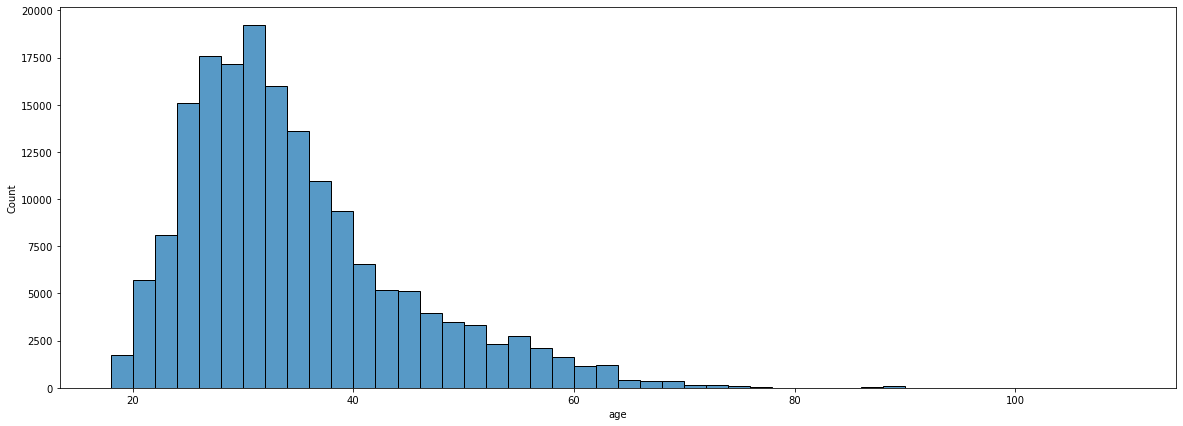

In [130]:
# plotting a standard-scaled histogram
plt.figure(figsize=[20,7])
bins=np.arange(18, 110+2, 2)
sb.histplot(data=df, x='age', bins=bins);

Our last univariate plot will be `bike_share_for_all_trip` distribution plot.

In [136]:
# using a waffle plot
# lets create a function that to decide how many blocks to allocate each category
def percentage_blocks(df, var):
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int)
    decimal = (percentages - counts).sort_values(ascending = False)
    
    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1
        
    return counts

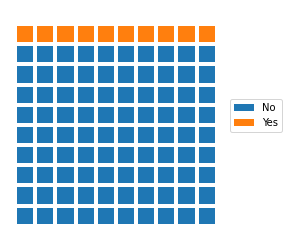

In [140]:
waffle_counts = percentage_blocks(df, 'bike_share_for_all_trip')

prev_count = 0
# for each category
for share in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[share])
    # and put a block at each index's location
    x = blocks  % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get ones digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[share]
    
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

The Waffleplot indicates that about 90% of riders didnt share their rides. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My primary variable of interest is the `duration_sec` variable, a normal scaled point of the variable looked irregular. To amend this, i looked at the data using a log transform.This scaling shows a normal distribution with a single duration peak between 300 and 1000 duration sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I checked for the age distribution of riders. To get this, i needed to wrangle the `start_time` column and the `member_birth_time` column. This was done to get the actual age of the riders.
A closer look at the age distribution showed some outliers (ages above 110 years). It's highly unlikely that people of that age range will be riding a bike. So i dropped such rows. These transformations made the data more accurate and tidy.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

